In [ ]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

## 1. Read On and Off region data

In [ ]:
dwarf = "bootes"
M = 1000
decay = "tt"
package="EventDisplay"
jProfile =None
th2Cut = 1
jProfile = const.OUTPUT_DIR+"/JProfile_EventDisplay_{}.root".format(dwarf)
hOn, hOff = Likelihood.eventdisplay.readData(dwarf, addTheta=True, ext=True)

In [ ]:
JProfile.generateConvolvedJ(dwarf, package, version="all", filename=jProfile, th2Cut=th2Cut,
                            seed=const.defaultNum[dwarf])

## 2. Calculate Signal

In [ ]:
hg_2d = Likelihood.combinedCalcSignal(dwarf, M, package, jProfile = jProfile, decay=decay, jArray=False,
                                      addTheta=True, th2Cut=th2Cut, verbose=True)

In [ ]:
plotRoot(hOff, hg_2d, logx=True, logx2=True)

## 3. Calculate Li&Ma significance

In [ ]:
linear = lambda x, a, b: a*x+b
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d 

output, x, y = getArray(hOff)
output_s, x, y = getArray(hg_2d)

signal = []
bkg = []
for i, (out_s) in enumerate(output_s):
    signal.append([y[i], sum(out_s)])
for i, (out) in enumerate(output):
    bkg.append([y[i], sum(out)])
signal = np.asarray(signal)
bkg = np.asarray(bkg)
bkg_ave = np.average(bkg[:,1])

N_off = []
N_on = []
temp_on = 0
temp_off = 0
for i, s in enumerate(signal[:,1]):
    b = bkg_ave
    temp_on += (s + b)
    temp_off += b/0.167
    N_off.append(temp_off)
    N_on.append(temp_on)

alpha = 0.167
N_on = np.asarray(N_on)
N_off = np.asarray(N_off)

sig = LiMaSiginficance(N_on, N_off, alpha)

## 4. Calculate expected Li&Ma significance.

In [ ]:
interp_f = interp1d(sig, signal[:,0])
thp = interp_f(max(sig))

## 5. Plot the result

In [ ]:
f, ax = plt.subplots(1,1, figsize=(5, 4))
ax.errorbar(bkg[:,0], bkg[:,1], yerr=np.sqrt(bkg[:,1]), ls="", marker="x", c = "k", label=r"Background x $\alpha$")
ax.errorbar(signal[:,0], signal[:,1]*20, yerr=np.sqrt(signal[:,1]*20), ls="", c="b", marker="x", label=r"Signal ($\sigma_\nu$ = 10$^{-23}$) x 20")
ax.axhline(bkg_ave, ls=":", c="k", alpha=0.5)

ax.plot(-1, 300, label="Li&Ma Significance", color="r")
ax.plot(-1, 300, label=r"$\theta^2_p$ = {:.3f} deg$^2$".format(thp), color="r", ls="--", alpha=0.5)
ax.set_xlabel(r"$\theta^2$ [deg$^2$]", fontsize=15)
ax.set_ylabel("Counts", fontsize=15)
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 300)
#ax.set_xticks([0.01, 0.02, 0.03, 0.04])
ax.legend(loc=5)
ax.grid(which="major", lw=0.5)
ax2=ax.twinx()
ax2.plot(signal[:,0], sig/max(sig), color="r", zorder=-1, label="Significance")
ax2.axhline(1, color="r", ls="--", alpha=0.5)
ax2.axvline(thp, color="r", ls="--", alpha=0.5)
ax2.set_ylabel("Relative significance", fontsize=15)
ax2.set_ylim(0, 1.1)

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].errorbar(bkg[:,0], bkg[:,1], yerr=np.sqrt(bkg[:,1]), ls="", marker="x", c = "k", label=r"$\alpha$ x $N_{OFF}$")
ax[0].errorbar(signal[:,0], signal[:,1]*20, yerr=np.sqrt(signal[:,1]*20), ls="", c="b", marker="x", label=r"$N_{S}$ ($\sigma_\nu$ = 10$^{-23}$) x 20")
ax[0].axhline(np.average(bkg[:,1]), ls=":", c="k", alpha=0.5)

ax[0].set_xlabel(r"$\theta^2$ [deg$^2$]", fontsize=12)
ax[0].set_ylabel("Counts", fontsize=12)
ax[0].set_xlim(0, 0.3)
ax[0].set_ylim(0, 300)
#ax[0].set_xticks([0.01, 0.02, 0.03, 0.04])
ax[0].legend(loc=1)
ax[0].grid(which="major", lw=0.5)
ax[1].plot(-1, 300, label="Li&Ma significance", color="r")
ax[1].errorbar(signal[:,0], N_on, yerr=np.sqrt(N_on), ls="", marker="x", c = "k", label=r"$N_{fON}$")
ax[1].errorbar(signal[:,0], N_off, yerr=np.sqrt(N_off), ls="", c="b", marker="x", label=r"$N_{OFF}$")
ax[1].set_yscale("log")
ax[1].grid(which="major", lw=0.5)
ax[1].legend(loc=4)
ax[1].set_xlim(0, )
ax[1].set_xlabel(r"$\theta^2$ [deg$^2$]", fontsize=12)
ax[1].set_ylabel("Cumulative counts", fontsize=12)
ax[1].set_xlim(0, 0.3)
ax2=ax[1].twinx()


ax2.plot(signal[:,0], sig/max(sig), color="r", zorder=-1, label="Significance")
ax2.axhline(1, color="r", ls="--", alpha=0.5)
ax2.axvline(thp, color="r", ls="--", alpha=0.5)
ax2.set_ylabel("Relative significance", fontsize=12)
ax2.set_ylim(0, 1.1)

plt.tight_layout()

## Conclusion

For segue 1, the best $\theta^2$ cut will be 0.009 deg$^2$ (for M = 1 TeV). However, $\theta^2$ of 0.008 deg$^2$ is good enough. Note that for M=0.5 TeV, $\theta^2$ = 0.011.

In [2]:
linear = lambda x, a, b: a*x+b
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d 
from tqdm.notebook import tqdm
m_thp = {}

In [78]:
dwarf="ursa_minor"
hOn, hOff = Likelihood.eventdisplay.readData(dwarf, addTheta=True, ext=False)
irf = ResponseFunction.EventDisplay.readIRFs(dwarf)

jProfile = const.OUTPUT_DIR+"/JProfile_EventDisplay_{}.root".format(dwarf)

In [76]:
hg_2d = Likelihood.calcSignal(dwarf, M, irf, jProfile=jProfile, #jSeed=defaultNum[dwarf],
                                              jArray=False, decay="tt", addTheta=True, 
                                              sigma=-23, th2Cut=1, ext=False, verbose=True)


[Log] Importing the IRFs (ursa_minor, EventDisplay, all).
[Log] Importing the DM spectrum (channel: tt).
[Log] Importing the J profile (file: /Users/dtak/Research/DarkMatter/Output//JProfile_EventDisplay_ursa_minor.root).
[Log] Convolved J profile (seed: 113) is imported.
[Log] Convolved 2D J profile (seed: 113) is imported.
[Log] Generating the signal spectrum.
6
7
[Log] Done.


In [81]:
for dwarf in ["segue_1", "ursa_minor", "draco", "bootes"]:
    m_thp[dwarf] = []
    decay = "tt"
    package="EventDisplay"
    jProfile = const.OUTPUT_DIR+"/JProfile_EventDisplay_{}.root".format(dwarf)
    mass = np.logspace(2.5, 4.5, 20)
    hOn, hOff = Likelihood.eventdisplay.readData(dwarf, addTheta=True, ext=False)
    irf = ResponseFunction.EventDisplay.readIRFs(dwarf)
    
    for mi, M in enumerate(tqdm(mass)):

        hg_2d = Likelihood.calcSignal(dwarf, M, irf, jProfile = jProfile, #jSeed=defaultNum[dwarf], 
                                              jArray=False, decay=decay, addTheta=True, 
                                              sigma=-23,th2Cut=1, ext=False)

        output, x, y = getArray(hOff)
        output_s, x, y = getArray(hg_2d)

        signal = []
        bkg = []
        for i, (out_s) in enumerate(output_s):
            signal.append([y[i], sum(out_s)])
        for i, (out) in enumerate(output):
            bkg.append([y[i], sum(out)])
        signal = np.asarray(signal)
        bkg = np.asarray(bkg)
        bkg_ave = np.average(bkg[:,1])

        N_off = []
        N_on = []
        temp_on = 0
        temp_off = 0
        alpha = 0.167
        for i, s in enumerate(signal[:,1]):
            b = bkg_ave
            temp_on += (s + b)
            temp_off += b/alpha
            N_off.append(temp_off)
            N_on.append(temp_on)


        N_on = np.asarray(N_on)
        N_off = np.asarray(N_off)

        sig = LiMaSiginficance(N_on, N_off, alpha)
        

        interp_f = interp1d(sig, signal[:,0], kind = "quadratic")
        thp = interp_f(max(sig))

        
        m_thp[dwarf].append([M, thp])

#         bkg_avg = np.average(bkg[:,1])
#         f, ax = plt.subplots(1,2, figsize=(10, 4))
#         ax[0].errorbar(bkg[:,0], bkg[:,1], yerr=np.sqrt(bkg[:,1]), ls="", marker="x", c = "k", label=r"$\alpha$ x $N_{OFF}$")
#         scale = max(bkg[:,1])/max(signal[:,1])*2
#         ax[0].errorbar(signal[:,0], signal[:,1]*scale, yerr=np.sqrt(signal[:,1]*scale), ls="", c="b", marker="x", label=r"$N_{S}$ ($\sigma_\nu$ = 10$^{-23}$) x 20")
#         ax[0].axhline(bkg_avg, ls=":", c="k", alpha=0.5)

#         ax[0].plot(-1, 300, label="Significance", color="r")
#         ax[0].plot(-1, 300, label=r"$\theta^2_p$ = {:.3f} deg$^2$".format(thp), color="r", ls="--", alpha=0.5)
#         ax[0].set_xlabel(r"$\theta^2$ [deg$^2$]", fontsize=12)
#         ax[0].set_ylabel("Counts", fontsize=12)
#         ax[0].set_xlim(0,0.5)
#         ax[0].set_ylim(0)
# #        ax[0].set_xticks([0.01, 0.02, 0.03, 0.04])
#         ax[0].legend(loc=5)
#         ax[0].grid(which="major", lw=0.5)
#         ax2=ax[0].twinx()
#         ax2.plot(signal[:,0], sig/max(sig), color="r", zorder=-1, label="Significance")
#         ax2.axhline(1, color="r", ls="--", alpha=0.5)
#         ax2.axvline(thp, color="r", ls="--", alpha=0.5)
#         ax2.set_ylabel("Relative significance", fontsize=12)
#         ax2.set_ylim(0, 1.1)

#         m_thp[dwarf] = np.asarray(m_thp[dwarf])
#         try:
#             ax[1].scatter(m_thp[dwarf][:,0], m_thp[dwarf][:,1])
#         except:
#             ax[1].scatter(m_thp[dwarf][0], m_thp[dwarf][1])
#         ax[1].axhline(0.008, color="r", ls=":", label=r"$\theta^2$ = 0.008")
#         ax[1].set_xlabel("Mass [GeV]", fontsize=12)
#         ax[1].set_ylabel(r"$\theta^2_p$ [deg$^2$]", fontsize=12)
#         ax[1].set_xscale("log")
#         ax[1].set_xlim(80, 5e4)
#         ax[1].grid(which="major")
#         ax[1].grid(which="minor", ls=":")
#         ax[1].legend()
#         m_thp[dwarf] =  m_thp[dwarf].tolist()
#         plt.tight_layout()
#         plt.savefig("{}.png".format(mi))
#         plt.show(block=False)

    m_thp[dwarf] = np.asarray(m_thp[dwarf])

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

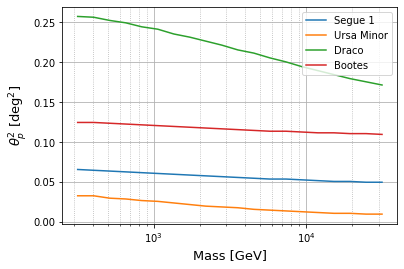

In [84]:
dwarfName = ["Segue 1", "Ursa Minor", "Draco", "Bootes"]
for i, dwarf in enumerate(["segue_1", "ursa_minor", "draco", "bootes"]):
    m_thp[dwarf] = np.asarray(m_thp[dwarf])
    plt.plot(m_thp[dwarf][:,0], m_thp[dwarf][:,1], label=dwarfName[i])

    #plt.title(r"Li&Ma significance")
    
#plt.axhline(0.02, color="r", ls=":", label=r"$\theta^2$ = 0.02")
plt.xlabel("Mass [GeV]", fontsize=13)
plt.ylabel(r"$\theta^2_p$ [deg$^2$]", fontsize=13)
plt.xscale("log")
#plt.yscale("log")
plt.grid(which="major")
plt.grid(which="minor", ls=":")
plt.legend()

  0%|          | 0/3 [00:00<?, ?it/s]

200.0
2000.0
20000.0


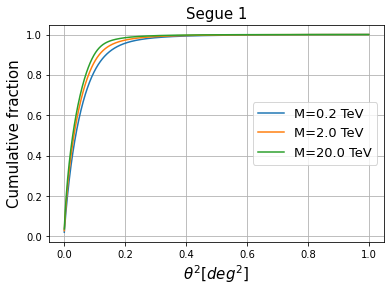

  0%|          | 0/3 [00:00<?, ?it/s]

200.0
2000.0
20000.0


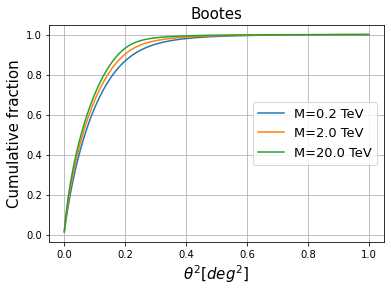

  0%|          | 0/3 [00:00<?, ?it/s]

200.0
2000.0
20000.0


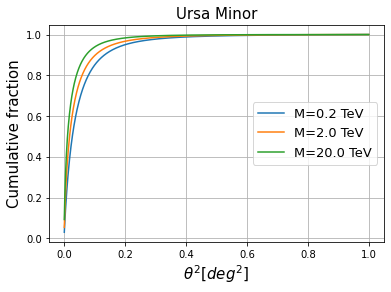

  0%|          | 0/3 [00:00<?, ?it/s]

200.0
2000.0
20000.0


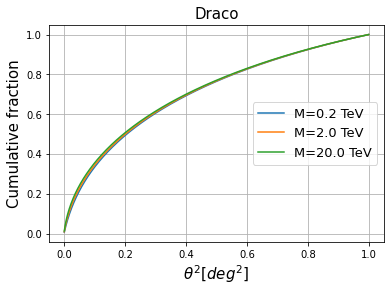

In [91]:
decay = "tt"
package="EventDisplay"

labs = ["Segue 1", "Bootes", "Ursa Minor", "Draco"]
for lbi, dwarf in enumerate(["segue_1", "bootes", "ursa_minor", "draco"]):
    seed = defaultNum[dwarf]
    f, ax = plt.subplots(1, 1)
#    ax2 = ax.twinx()
    jProfile = const.OUTPUT_DIR+"/JProfile_EventDisplay_{}.root".format(dwarf)
    irf = ResponseFunction.EventDisplay.readIRFs(dwarf)
    
    for mi, M in enumerate(tqdm([2e2, 2e3, 2e4])):
        print(M)
        hg_2d = Likelihood.calcSignal(dwarf, M, irf, package=package, jProfile = jProfile, 
                                              jArray=False, decay=decay, addTheta=True, 
                                              th2Cut=1, ext=False, verbose=False)
        
        output_s, x, y = getArray(hg_2d)

        signal = []
        for i, (out_s) in enumerate(output_s):
            signal.append([y[i], sum(out_s)])
        signal = np.asarray(signal)

        cum = np.cumsum(signal[:,1])
        #ax.plot(signal[:,0], signal[:,1]/max(signal[:,1]), label="M={:.1f} TeV".format(M/1000))
        ax.plot(signal[:,0], cum/max(cum), label="M={:.1f} TeV".format(M/1000))


#    ax.axvline(0.02, c="k", ls=":")
    ax.set_xlabel(r"$\theta^2 [deg^2]$", fontsize=15)
#    ax.set_ylabel(r"Relative rate", fontsize=15)
    ax.set_ylabel(r"Cumulative fraction", fontsize=15)
    ax.legend(fontsize=13, loc=5)
    ax.set_title(labs[lbi], fontsize=15)
    ax.grid()
    plt.show(block=False)
